In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set(style="darkgrid")
from matplotlib import gridspec

#### Plot line curve and histogram jointly

In [67]:
## Mockup data
num_samples = 1000
x = 0.15 * np.random.randn(num_samples)
t = np.arange(num_samples)

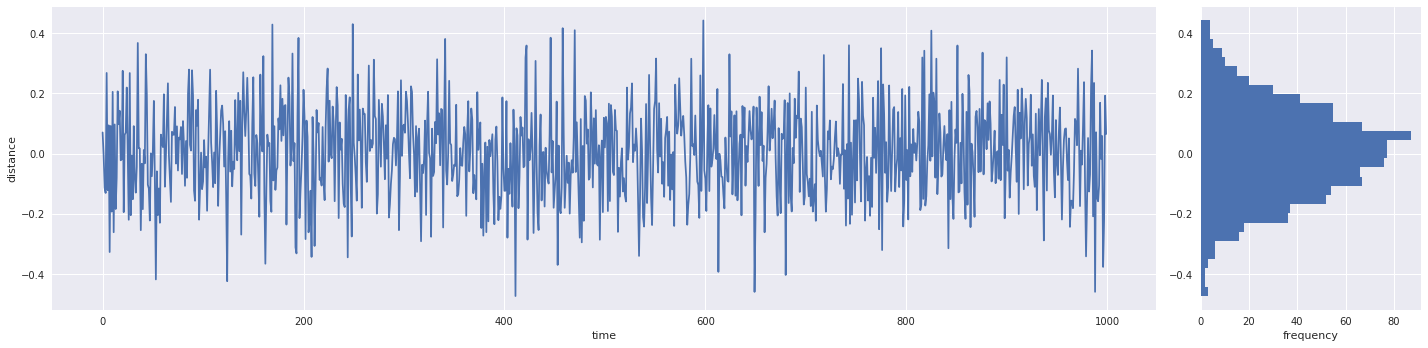

In [74]:
fig = plt.figure(figsize=(20, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1])
ax0 = plt.subplot(gs[0])
plt.xlabel('time')
plt.ylabel('distance')
ax0.plot(t, X)

ax1 = plt.subplot(gs[1])
vert_hist = np.histogram(X)
ax1.hist(X, bins=30, orientation="horizontal");
plt.xlabel('frequency')

plt.tight_layout()